**Exercise 18.1a**

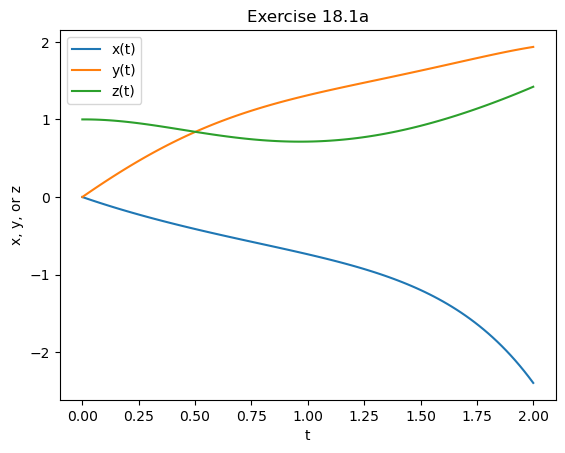

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def eulers_method_system(t0, tf, N):
    dt = (tf - t0) / N
    t = np.linspace(t0, tf, N + 1)

    # Arrays
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    z = np.zeros(N + 1)
    
    x[0] = 0
    y[0] = 0
    z[0] = 1
    
    # Iteration
    for i in range(N):
        x[i + 1] = x[i] + (x[i] * y[i] - z[i] + t[i]) * dt
        y[i + 1] = y[i] + (2 * z[i] + x[i]) * dt
        z[i + 1] = z[i] + (t[i] ** 2 - y[i] * z[i]) * dt

    return t, x, y, z


t, x, y, z = eulers_method_system(0, 2.0, 100)


plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.plot(t, z, label='z(t)')
plt.xlabel('t')
plt.ylabel('x, y, or z')
plt.legend()
plt.title("Exercise 18.1a")
plt.show()

**Exercsie 18.1b**

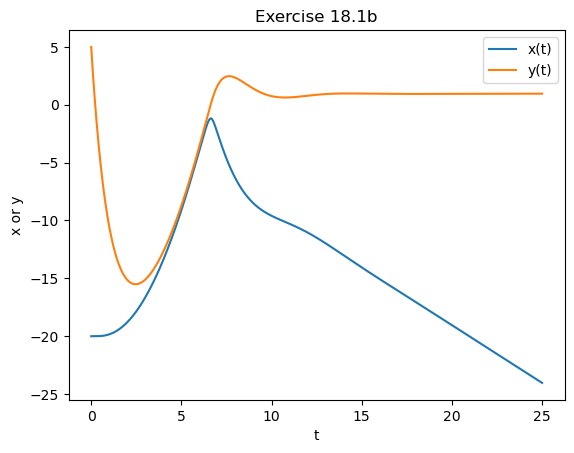

x(25) = -24.03836
y(25) = 0.95994


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def eulers_method_system(t0, tf, N):
    dt = (tf - t0) / N
    t = np.linspace(t0, tf, N + 1)

    # Arrays
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    
    x[0] = -20
    y[0] = 5

    # Iteration
    for i in range(N):
        dxdt = (y[i] * t[i]) / x[i]
        dydt = x[i] - y[i] + t[i]
        
        x[i + 1] = x[i] + dxdt * dt
        y[i + 1] = y[i] + dydt * dt

    return t, x, y


t, x, y = eulers_method_system(0, 25, 1000) 

# Plot
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('x or y')
plt.legend()
plt.title("Exercise 18.1b")
plt.show()


print(f"x(25) = {x[-1]:.5f}")
print(f"y(25) = {y[-1]:.5f}")


**Exercise 18.3b**

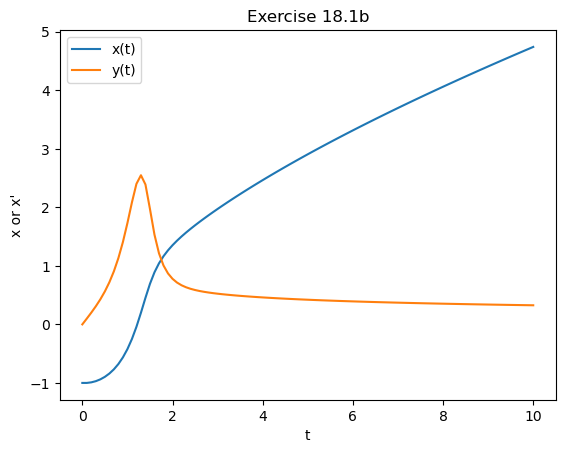

In [25]:
# x' = y
# x'' = 1 - 2x(x')^2 --> y' = 1-2xy^2
# x(0) = -1
# x'(0) = 0 --> y(0) = 0 

import numpy as np
import matplotlib.pyplot as plt

def eulers_method_system(t0, tf, N):
    dt = (tf - t0) / N
    t = np.linspace(t0, tf, N + 1)

    # Arrays
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    
    x[0] = -1
    y[0] = 0

    # Iteration
    for i in range(N):
        dxdt = y[i]
        dydt = 1 - 2 * x[i] * y[i] ** 2
        
        x[i + 1] = x[i] + dxdt * dt
        y[i + 1] = y[i] + dydt * dt

    return t, x, y


t, x, y = eulers_method_system(0, 10, 100) 

# Plot
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel("x or x'")
plt.legend()
plt.title("Exercise 18.1b")
plt.show()


**Exercise 18.4b**

x(10) = 0.31741

ANSWER: For the R2K Method, it took roughly N=130 timesteps (maybe less) to reach 5 significant figures. For Euler, it takes N=4400 timesteps.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def f1(t, x, y):
    return np.sin(t * x)

def f2(t, x, y):
    return y**2 - x

# RK2 method
def rk2(t0, tf, N):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = 1.0
    y[0] = 0.0

    # RK2 iteration
    for i in range(N):
        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        tm = t[i] + h/2
        xm = x[i] + (h/2) * k1x
        ym = y[i] + (h/2) * k1y

        k2x = f1(tm, xm, ym)
        k2y = f2(tm, xm, ym)

        x[i+1] = x[i] + h * k2x
        y[i+1] = y[i] + h * k2y
        t[i+1] = t[i] + h

    return t, x, y

# Parameters
t0 = 0.0
tf = 10.0
N = 300  

# Solve
for i in range( 130, 140 + 1 ):
    t, x, y = rk2(t0, tf, i)
    print("x(10) =", x[-1])

x(10) = 0.31740923559440104
x(10) = 0.3174090674283861
x(10) = 0.31740890432206725
x(10) = 0.3174087460714392
x(10) = 0.3174085924828083
x(10) = 0.3174084433721656
x(10) = 0.31740829856461755
x(10) = 0.31740815789382815
x(10) = 0.31740802120152145
x(10) = 0.3174078883370184
x(10) = 0.31740775915678626

y(10) = -0.5909200338384958
y(10) = -0.590919947310519
y(10) = -0.5909198626529627
y(10) = -0.590919779814277
y(10) = -0.5909196987445618
y(10) = -0.590919619395511
y(10) = -0.5909195417203691
y(10) = -0.5909194656738658
y(10) = -0.5909193912121706
y(10) = -0.5909193182928486
y(10) = -0.5909192468748009


In [57]:
import numpy as np
import matplotlib.pyplot as plt

def f1(t, x, y):
    return np.sin(t * x)

def f2(t, x, y):
    return y**2 - x

def eulers_method_system(t0, tf, N):
    dt = (tf - t0) / N
    t = np.linspace(t0, tf, N + 1)

    # Arrays
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    
    x[0] = -1
    y[0] = 0

    # Iteration
    for i in range(N):
        dxdt = f1(t[i], x[i], y[i])
        dydt = f2(t[i], x[i], y[i])
        
        x[i + 1] = x[i] + dxdt * dt
        y[i + 1] = y[i] + dydt * dt

    return t, x, y

# Parameters
t0 = 0.0
tf = 10.0


for i in range(4400, 4410 + 1):
    t, x, y = eulers_method_system(t0, tf, i)
    print(f"x(10) = {x[-1]}")

x(10) = -0.3174000000388978
x(10) = -0.31740000021931636
x(10) = -0.31740000039965255
x(10) = -0.31740000057990714
x(10) = -0.31740000076007974
x(10) = -0.31740000094017085
x(10) = -0.31740000112018
x(10) = -0.3174000013001075
x(10) = -0.3174000014799535
x(10) = -0.3174000016597179
x(10) = -0.31740000183940065


/var/folders/hx/y69mzyxx0zsdy5flwjfxd53h0000gn/T/ipykernel_25767/342862527.py:8: RuntimeWarning: overflow encountered in scalar power
  return y**2 - x


**Exercise 18.5a**

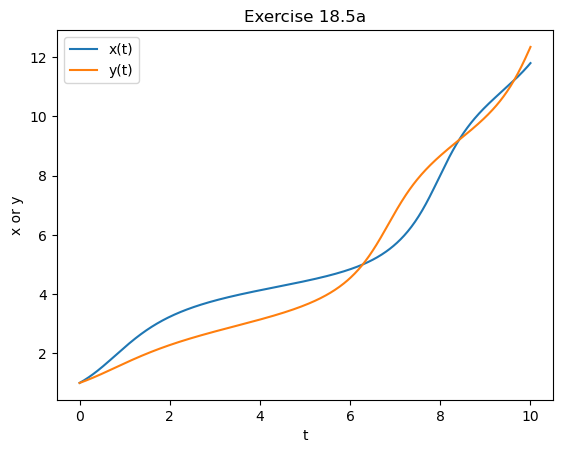

x(10) = 11.7957
y(10) = 12.3417


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define system of ODEs
def f1(t, x, y):
    return np.log(y) + np.sin(x)

def f2(t, x, y):
    return np.log(x) + np.cos(y)

# RK4
def rk4(t0, tf, N):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = 1.0
    y[0] = 1.0

    # iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y

# Parameters
t0 = 0.0
tf = 10.0
N = 500 


t, x, y = rk4(t0, tf, N)

# Plot
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('x or y')
plt.legend()
plt.title('Exercise 18.5a')
plt.show()


print(f"x(10) = {x[-1]:.4f}")
print(f"y(10) = {y[-1]:.4f}")


**Exercise 18.6c**

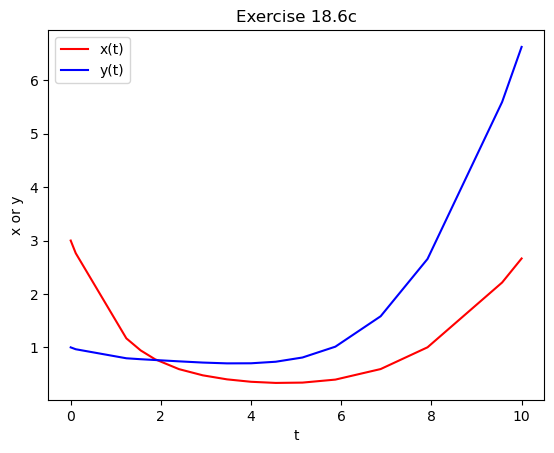

In [65]:
import numpy as np 
import scipy.integrate as si 
import matplotlib.pyplot as plt

# right-hand sides of ODEs 
def F(t, variables, a, b): 
    x,y = variables 
    dxdt = x**0.5 - a*x/y 
    dydt = t/b - y/x
    return dxdt, dydt

# parameters 
a = 1.3
b = 2.0
ti = 0.0 # initial time 
tf = 10.0 # final time

# initial conditions 
xi = 3.0
yi = 1.0

# solve the ODEs 
u = si.solve_ivp(F,[ti,tf],[xi,yi],args=[a,b]) 
t = u.t    # independent variable 
x = u.y[0] # first dependent variable 
y = u.y[1] # second dependent variable

# plot results 
plt.close() 
plt.plot(t, x, 'r', label="x(t)") 
plt.plot(t, y, 'b', label="y(t)")
plt.title("Exercise 18.6c")
plt.xlabel("t")
plt.ylabel("x or y")
plt.legend()
plt.show()

**Exercise 18.7c**

ANSWER: The RK4 and RK45 code seems very closely aligned at all resolutions. 

RK4 final values (low N): x = 0.31743473836534164 , y = -0.5909099205592531
RK4 final values (high N): x = 0.31740079551900474 , y = -0.5909135904024652
RK45 final values: x = 0.31756404929650905 , y = -0.5908945488524515


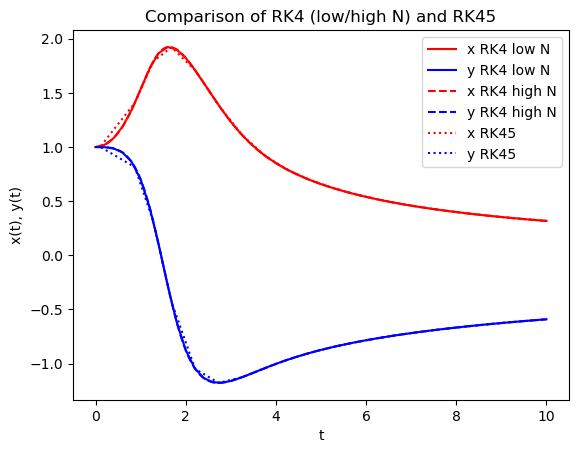

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si

def f1(t, x, y):
    return np.sin(t * x)

def f2(t, x, y):
    return y**2 - x

# RK4 solver
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y

# RK45 
def F(t, variables): 
    x, y = variables
    return np.array([f1(t, x, y), f2(t, x, y)])

# Parameters
ti = 0.0
tf = 10.0
xi = 1.0
yi = 1.0

# RK4 solutions
N_low = 50
N_high = 500
t_low, x_low, y_low = rk4(ti, tf, N_low, xi, yi)
t_high, x_high, y_high = rk4(ti, tf, N_high, xi, yi)

# RK45 solution
u = si.solve_ivp(F, [ti, tf], [xi, yi])
t_45 = u.t
x_45 = u.y[0]
y_45 = u.y[1]

# Print final values
print("RK4 final values (low N): x =", x_low[-1], ", y =", y_low[-1])
print("RK4 final values (high N): x =", x_high[-1], ", y =", y_high[-1])
print("RK45 final values: x =", x_45[-1], ", y =", y_45[-1])

# Plot comparison

plt.plot(t_low, x_low, 'r-', label="x RK4 low N")
plt.plot(t_low, y_low, 'b-', label="y RK4 low N")

plt.plot(t_high, x_high, 'r--', label="x RK4 high N")
plt.plot(t_high, y_high, 'b--', label="y RK4 high N")

plt.plot(t_45, x_45, 'r:', label="x RK45")
plt.plot(t_45, y_45, 'b:', label="y RK45")

plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.title("Comparison of RK4 (low/high N) and RK45")
plt.legend()
plt.show()
